# Predict readmission rate for diabetes patients

### Project introduction and background 

* As part of the  Affordable Health Care Act, hospitals are requested to improve the qualities of the health care services, one of which concerns with reducing readmission rate. As a result, Hospital Readmission Reduction Program (HRRP) is created to reduce reimbursement to hospitals with excessive readmissions. Hospitals need to account for this change and introduce some necessary measures to inspect their readmission situation. The first question the hospital want to find out is which patient and why they are readmitted. For further prevention, they want to predict whether their patients will be admitted again. 

* Diabetes problem has affected a great population in the US. One in 10 people is diagnosed as having diabetes according to a report released by [Ostling et al 2017](https://clindiabetesendo.biomedcentral.com/articles/10.1186/s40842-016-0040-x). People who is diagnosed as diabetes are more likely to be readmitted to hospital stated in the report. Thus we try to predict the readmission rate for diabetes patients from a dataset containing the diabetes patient data from 130 US hospitals.


### Project Goal 

We are aiming to build a classification model on predicting whether a diabetic patient will be readmitted to the hospital.
The target varible *readmitted* is a binary object that shows whether the patient is readmitted within 30 days 


### Dataset

The dataset is obtained from [UCI repository](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#) with 101766 instances and 50 features. Relevant rearch use this dataset()
The feature description, type, and data missingness are as followed:
![](diabetes_feature.png)
                                              

### Data Preprocessing

**describe what columns to transform for different encoder and why**

In [3]:
import pandas as pd
diab_df=pd.read_csv('diabetic_data.csv')
diab_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Since we inspected that feature *Weight* has more than 97% of missing values, we decided to drop this feature. Payer code is also irrelevant to our target variable and it is dropped in this dataset. 

In [4]:
diab_df.drop(['weight','payer_code'],1,inplace=True)

For 24 features for medications, some features might have uniform answers and thus might not bring more information to this data set. We first check the unique values of these columns.

In [5]:
med=list(diab_df.iloc[:, 22:45].columns)
for i in range(len(med)):
    if len(diab_df[med[i]].unique())<2:
        print(med[i])

examide
citoglipton


drop these two variables

In [6]:
diab_df.drop(['examide','citoglipton'],1,inplace=True)

**Transform variables**

Transform the diagnosis data to string according to diagnosis table ![](table2.png)

In [7]:
def transform_diagnosis(df,target, column):

    diab_df[column] = diab_df[target]
    diab_df.loc[diab_df[target].str.contains('V',na=False), [column]] = 1000
    diab_df.loc[diab_df[target].str.contains('E',na=False), [column]] = 1000
    diab_df.loc[diab_df[target].str.contains('250',na=False), [column]] = 2500
    diab_df[column].replace('Missing',-1,inplace=True)
    diab_df[column] = diab_df[column].astype(float)
    diab_df[column][((diab_df[column]>=390) & (diab_df[column]<460)) | (diab_df[column]==785)] = 1001
    diab_df[column][((diab_df[column]>=460) & (diab_df[column]<520)) | (diab_df[column]==786)] = 1002
    diab_df[column][((diab_df[column]>=520) & (diab_df[column]<580)) | (diab_df[column]==787)] = 1003
    diab_df[column][((diab_df[column]>=800) & (diab_df[column]<1000))] = 1005
    diab_df[column][((diab_df[column]>=710) & (diab_df[column]<740))] = 1006
    diab_df[column][((diab_df[column]>=580) & (diab_df[column]<630)) | (diab_df[column]==788)] = 1007
    diab_df[column][((diab_df[column]>=140) & (diab_df[column]<240))] = 1008
    diab_df[column][((diab_df[column]>=0) & (diab_df[column]<1000))] = 1000
    diab_df[column].replace(1001,'Circulatory',inplace=True)
    diab_df[column].replace(1002,'Respiratory',inplace=True)
    diab_df[column].replace(1003,'Digestive',inplace=True)
    diab_df[column].replace(2500,'Digestive',inplace=True)
    diab_df[column].replace(1005,'Injury',inplace=True)
    diab_df[column].replace(1006,'Musculoskeletal',inplace=True)
    diab_df[column].replace(1007,'Genitourinary',inplace=True)
    diab_df[column].replace(1008,'Neoplasms',inplace=True)
    diab_df[column].replace(1000,'Other',inplace=True)
    diab_df[column].replace(-1,'Missing',inplace=True)

In [8]:
diab_df.diag_1.replace('?','Missing',inplace=True)
diab_df.diag_2.replace('?','Missing',inplace=True)
diab_df.diag_3.replace('?','Missing',inplace=True)

In [9]:
transform_diagnosis(diab_df, 'diag_1','diag_1_group')
transform_diagnosis(diab_df, 'diag_2','diag_2_group')
transform_diagnosis(diab_df, 'diag_3','diag_3_group')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by Interac

In [10]:
diab_df.drop(['diag_1','diag_2','diag_3'],1,inplace=True)

In [11]:
#Change some column values to string
diab_df['admission_type_id'] = diab_df['admission_type_id'].astype(str)
diab_df['discharge_disposition_id'] = diab_df['discharge_disposition_id'].astype(str)
diab_df['admission_source_id'] = diab_df['admission_source_id'].astype(str)


In [12]:
len(diab_df.columns)

46

**Ordinal Encoder**  
Features such as 'metformin', 'repaglinide', 'nateglinide'... are rated as NO, DOWN STEADY AND UP based on patient's current medical situation. So we use Ordinal Encoder in order to show the severity of patient's situtation.

In [13]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np 
order_columns=['age']
X_age=diab_df[order_columns].copy()
enc = OrdinalEncoder(categories = [['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)' ]]) # The ordered list of 
# fit the training data

X_age= enc.fit_transform(X_age)
X_age = pd.DataFrame(X_age, columns = order_columns)
diab_df[order_columns] = X_age[order_columns]

In [14]:


med_columns=['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']


In [15]:
for i in range(len(med_columns)):
    X_med= pd.DataFrame(diab_df[med_columns[i]], columns = [med_columns[i]])
    enc = OrdinalEncoder(categories = [['No','Down','Steady','Up']]) # The ordered list of 
        # fit the training data
    X_med= enc.fit_transform(X_med)

    #X_med = pd.DataFrame(X_med, columns = ['metformin'])
    diab_df[[med_columns[i]]]=X_med

**Onehot Encoder**

Race, gender, medical_specialty,diag_1_group,diag_2_group,diag_3_group are either the patient's features or diagnosis. So we take each of them as a single feature and use one hot encoder.

In [16]:
from sklearn.preprocessing import OneHotEncoder
trans_columns=['race', 'gender','medical_specialty','diag_1_group','diag_2_group','diag_3_group','max_glu_serum','A1Cresult']
X_onehot=diab_df[trans_columns].copy()
ohot= OneHotEncoder(sparse=False, handle_unknown='ignore')
ohot.fit(X_onehot)
column_name =ohot.get_feature_names(trans_columns)
X_onehot=ohot.transform(X_onehot)
X_onehot=pd.DataFrame(X_onehot, columns = column_name)
#df[trans_columns] = X_onehot[trans_columns]


In [17]:
X_onehot.head()

,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,medical_specialty_?,...,diag_3_group_Other,diag_3_group_Respiratory,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
diab_df.drop(['race', 'gender','medical_specialty','diag_1_group','diag_2_group','diag_3_group'],1,inplace=True)

**Continuous Data Inspection**

In [19]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
#inspect the distribution of the data 
fig = plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
plt.hist(diab_df['age'], bins = 30, rwidth = 0.8)
plt.subplot(2,2,2)
plt.hist(diab_df['time_in_hospital'], bins = 30, rwidth = 0.8)
plt.subplot(2,2,3)
plt.hist(diab_df['num_lab_procedures'], bins = 30, rwidth = 0.8)
plt.subplot(2,2,4)
plt.hist(diab_df['num_procedures'], bins = 30, rwidth = 0.8)

(array([46652.,     0.,     0.,     0.,     0., 20742.,     0.,     0.,
            0.,     0., 12717.,     0.,     0.,     0.,     0.,  9443.,
            0.,     0.,     0.,     0.,  4180.,     0.,     0.,     0.,
            0.,  3078.,     0.,     0.,     0.,  4954.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
        5.2, 5.4, 5.6, 5.8, 6. ]),
 <a list of 30 Patch objects>)

(array([6.7630e+04, 1.9521e+04, 7.5660e+03, 0.0000e+00, 3.4110e+03,
        1.6220e+03, 0.0000e+00, 8.1200e+02, 4.8000e+02, 0.0000e+00,
        2.6800e+02, 1.5100e+02, 1.1100e+02, 0.0000e+00, 6.1000e+01,
        4.9000e+01, 0.0000e+00, 3.4000e+01, 2.0000e+01, 0.0000e+00,
        1.0000e+01, 9.0000e+00, 6.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ,
         7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. , 14.7,
        15.4, 16.1, 16.8, 17.5, 18.2, 18.9, 19.6, 20.3, 21. ]),
 <a list of 30 Patch objects>)

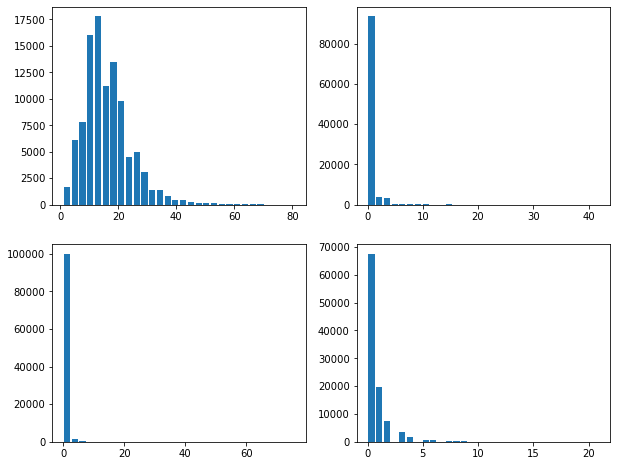

In [20]:
fig = plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
plt.hist(diab_df['num_medications'], bins = 30, rwidth = 0.8)
plt.subplot(2,2,2)
plt.hist(diab_df['number_outpatient'], bins = 30, rwidth = 0.8)
plt.subplot(2,2,3)
plt.hist(diab_df['number_emergency'], bins = 30, rwidth = 0.8)
plt.subplot(2,2,4)
plt.hist(diab_df['number_inpatient'], bins = 30, rwidth = 0.8)



(array([2.1900e+02, 0.0000e+00, 1.0230e+03, 0.0000e+00, 2.8350e+03,
        0.0000e+00, 5.5370e+03, 0.0000e+00, 1.1393e+04, 0.0000e+00,
        1.0161e+04, 0.0000e+00, 1.0393e+04, 0.0000e+00, 1.0616e+04,
        0.0000e+00, 4.9474e+04, 0.0000e+00, 1.7000e+01, 0.0000e+00,
        1.1000e+01, 0.0000e+00, 9.0000e+00, 0.0000e+00, 1.6000e+01,
        0.0000e+00, 7.0000e+00, 0.0000e+00, 1.0000e+01, 4.5000e+01]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
        12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ]),
 <a list of 30 Patch objects>)

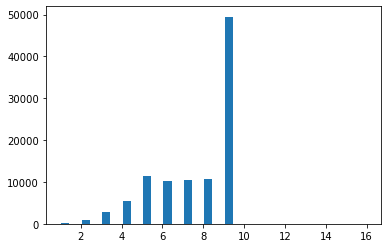

In [21]:
plt.hist(diab_df['number_diagnoses'], bins = 30, rwidth = 0.8)

From the histogram we plotted, we inspected that for some continous features such as 'age','number of procedures','number of diagnoses' fall into a certain range and we could use MinMax Scalar. For the rest of the variables that have right-skewed features, we use standard scalar to fix the data distribution.


**MinMax Scalar**

In [22]:
from sklearn.preprocessing import MinMaxScaler
tran_columns=['age','num_procedures','number_diagnoses']
x_minmax=diab_df[tran_columns].copy()
scaler = MinMaxScaler()
x_minmax=scaler.fit_transform(x_minmax)
x_minmax=pd.DataFrame(x_minmax,columns=tran_columns)
diab_df[tran_columns]=x_minmax[tran_columns]

**Standard Scalar**

In [23]:
from sklearn.preprocessing import StandardScaler
tr_columns=['time_in_hospital','num_lab_procedures','num_medications','number_outpatient','number_emergency','number_inpatient']
X_std=diab_df[tr_columns].copy()
scaler = StandardScaler()
X_std= scaler.fit_transform(X_std)
X_std = pd.DataFrame(X_std, columns = tr_columns)
diab_df[tr_columns] = X_std[tr_columns]

In [24]:
diab_df[:10]

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,0.000000,6,25,1,-1.137649,-0.106517,0.000000,-1.848268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,NO
1,149190,55629189,0.111111,1,1,7,-0.467653,0.808384,0.000000,0.243390,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,Ch,Yes,>30
2,64410,86047875,0.222222,1,1,7,-0.802651,-1.631351,0.833333,-0.371804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,Yes,NO
3,500364,82442376,0.333333,1,1,7,-0.802651,0.045967,0.166667,-0.002688,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,Ch,Yes,NO
4,16680,42519267,0.444444,1,1,7,-1.137649,0.401761,0.000000,-0.986997,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Ch,Yes,NO
5,35754,82637451,0.555556,2,1,2,-0.467653,-0.614795,1.000000,-0.002688,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,No,Yes,>30
6,55842,84259809,0.666667,3,1,2,-0.132655,1.367490,0.166667,0.612506,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Ch,Yes,NO
7,63768,114882984,0.777778,1,1,7,0.202343,1.519973,0.000000,-0.494842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,Yes,>30
8,12522,48330783,0.888889,2,1,4,2.882327,1.265834,0.333333,1.473776,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Ch,Yes,NO
9,15738,63555939,1.000000,3,3,4,2.547329,-0.513139,0.500000,0.243390,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Ch,Yes,NO


**Label Scalar**

In [25]:
from sklearn.preprocessing import LabelEncoder
x_le=diab_df['readmitted'].copy()
le = LabelEncoder()
x_le=le.fit_transform(x_le)
x_le = pd.DataFrame(x_le, columns = ['readmitted'])
diab_df['readmitted'] = x_le['readmitted']


In [26]:
diab_df.change.replace('No',0,inplace=True)
diab_df.change.replace('Ch',1,inplace=True)
diab_df.diabetesMed.replace('No',0,inplace=True)
diab_df.diabetesMed.replace('Yes',1,inplace=True)

In [27]:
diab_df[:10]

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,0.000000,6,25,1,-1.137649,-0.106517,0.000000,-1.848268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2
1,149190,55629189,0.111111,1,1,7,-0.467653,0.808384,0.000000,0.243390,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1,1,1
2,64410,86047875,0.222222,1,1,7,-0.802651,-1.631351,0.833333,-0.371804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2
3,500364,82442376,0.333333,1,1,7,-0.802651,0.045967,0.166667,-0.002688,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1,1,2
4,16680,42519267,0.444444,1,1,7,-1.137649,0.401761,0.000000,-0.986997,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,1,2
5,35754,82637451,0.555556,2,1,2,-0.467653,-0.614795,1.000000,-0.002688,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1,1
6,55842,84259809,0.666667,3,1,2,-0.132655,1.367490,0.166667,0.612506,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,1,2
7,63768,114882984,0.777778,1,1,7,0.202343,1.519973,0.000000,-0.494842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
8,12522,48330783,0.888889,2,1,4,2.882327,1.265834,0.333333,1.473776,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,1,2
9,15738,63555939,1.000000,3,3,4,2.547329,-0.513139,0.500000,0.243390,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,1,2


In [28]:
df_final=pd.concat([diab_df, X_onehot],axis=1)

In [29]:
df_final.to_csv('preprocessed_diab_df.csv')